# Tratamento de Dados - Inventário de Concessionária

O objetivo deste Script é demonstrar como importar e tratar uma base de dados, de forma a deixá-la adequeda para criação de modelos preditivos em Machine Learning

## 1 - Importação de Bibliotecas Necessárias

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import locale

## 2- Importação da Base de Dados no Pandas

In [16]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_dados = pd.read_excel("Database.xlsx")

## 3- Análises de características iniciais do DataFrame

In [17]:
# Verificar quantidade de linhas e colunas presentes
df_dados.shape

(986, 10)

In [18]:
# Retornar as primeiras 5 linhas do dataframe para termos noção da disposição dos dados
df_dados.head()

,DATA_VENDA,MODELO,KM-LITRO,CILINDROS,PESO(KG),VELOCIDADE_MAXIMA(KM/H),CAVALOS,TRANSMISSAO,VALOR,CATEGORIA
0,10/1/2020,LABORGUINI,3.0,12,1200,360,700,AUTOMATICO,50000000,IMPORTADO
1,10/1/2020,LABORGUINI,3.0,12,1200,360,700,AUTOMATICO,50000000,IMPORTADO
2,10/1/2020,LABORGUINI,3.0,12,1200,360,700,AUTOMATICO,900000,IMPORTADO
3,10/1/2020,FERRARI,3.0,12,1400,360,640,AUTOMATICO,900000,IMPORTADO
4,10/1/2020,ASTON MARTIN,3.5,10,1600,360,620,AUTOMATICO,900000,IMPORTADO


In [19]:
# Retornar últimas 5 linhas do dataframe, para verificar se há informações desnecessárias no dataframe, como linha de totais ou linhas em branco
df_dados.tail()

,DATA_VENDA,MODELO,KM-LITRO,CILINDROS,PESO(KG),VELOCIDADE_MAXIMA(KM/H),CAVALOS,TRANSMISSAO,VALOR,CATEGORIA
981,10/12/2021,HONDA FIT,12.0,4,1700,200,116,AUTOMATICO,120000,NACIONAL
982,10/12/2021,PALIO,11.0,4,1700,200,118,MANUAL,60000,NACIONAL
983,10/12/2021,UNO,13.5,4,1700,200,118,MANUAL,48000,NACIONAL
984,10/12/2021,MOBI,14.0,4,1700,200,118,MANUAL,42000,NACIONAL
985,10/12/2021,PASSAT,8.0,6,1800,200,118,MANUAL,200000,IMPORTADO


In [20]:
# Verificar informações sobre os dados(Tipo de variáveis, Variáveis, Quantidade de registros, etc)
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DATA_VENDA               986 non-null    object 
 1   MODELO                   986 non-null    object 
 2   KM-LITRO                 984 non-null    float64
 3   CILINDROS                986 non-null    int64  
 4   PESO(KG)                 986 non-null    int64  
 5   VELOCIDADE_MAXIMA(KM/H)  986 non-null    int64  
 6   CAVALOS                  986 non-null    int64  
 7   TRANSMISSAO              986 non-null    object 
 8   VALOR                    986 non-null    object 
 9   CATEGORIA                986 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 77.2+ KB


In [21]:
# Avaliar se alguma coluna possui valor nulo ou chamado de valores missing ou NAN (Not Available)
df_dados.isnull().sum()

DATA_VENDA                 0
MODELO                     0
KM-LITRO                   2
CILINDROS                  0
PESO(KG)                   0
VELOCIDADE_MAXIMA(KM/H)    0
CAVALOS                    0
TRANSMISSAO                0
VALOR                      0
CATEGORIA                  0
dtype: int64

## 4- Tratamento de Dados

In [22]:
# Tratar itens nulos da coluna "KM-LITRO", substituindo-os pela mediana da coluna
df_dados['KM-LITRO'] = df_dados['KM-LITRO'].fillna((df_dados['KM-LITRO'].median()))

In [23]:
# Conferência da correção de dados nulos
df_dados.isnull().sum()

DATA_VENDA                 0
MODELO                     0
KM-LITRO                   0
CILINDROS                  0
PESO(KG)                   0
VELOCIDADE_MAXIMA(KM/H)    0
CAVALOS                    0
TRANSMISSAO                0
VALOR                      0
CATEGORIA                  0
dtype: int64

In [24]:
# Agrupamento da coluna "VALOR" para identificar possíveis discrepâncias
df_dados.groupby(['VALOR']).size()

VALOR
18000         48
28000         42
30000         24
35000         42
40000         30
42000         66
48000         66
60000         66
85000         36
110000        24
120000        66
150000        36
200000        65
220000        36
280000        66
400000        36
800000        66
900000       168
50000000       2
SEM VALOR      1
dtype: int64

In [25]:
# Retornar registro cujo campo "VALOR" esteja preenchido como "SEM VALOR"
verificar_valor = df_dados[df_dados['VALOR'] == 'SEM VALOR']
print (verificar_valor)

   DATA_VENDA  MODELO  KM-LITRO  CILINDROS  PESO(KG)  VELOCIDADE_MAXIMA(KM/H)  \
45  10/3/2020  PASSAT       8.0          6      1800                      200   

    CAVALOS TRANSMISSAO      VALOR  CATEGORIA  
45      118      MANUAL  SEM VALOR  IMPORTADO  


In [26]:
# agora que sabemos que trata-se de um carro modelo "PASSAT", substituiremos o termo "SEM VALOR" pela mediada do modelo "PASSAT"
df_dados.loc[df_dados['VALOR'] == 'SEM VALOR', 'VALOR'] = 0
df_dados['VALOR'] = df_dados['VALOR'].astype(np.float64)
mediana_passat = df_dados.loc[df_dados['MODELO'] == 'PASSAT', 'VALOR'].median()
df_dados.loc[(df_dados['VALOR'] == 0) & (df_dados['MODELO'] == 'PASSAT'), 'VALOR'] = mediana_passat

In [27]:
# Conferência do agrupamento de valores, para vermos se o termo "SEM VALOR" foi substituído
df_dados.groupby(['VALOR']).size()

VALOR
18000.0        48
28000.0        42
30000.0        24
35000.0        42
40000.0        30
42000.0        66
48000.0        66
60000.0        66
85000.0        36
110000.0       24
120000.0       66
150000.0       36
200000.0       66
220000.0       36
280000.0       66
400000.0       36
800000.0       66
900000.0      168
50000000.0      2
dtype: int64

In [28]:
# Nova verificação dos tipos de variáveis
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DATA_VENDA               986 non-null    object 
 1   MODELO                   986 non-null    object 
 2   KM-LITRO                 986 non-null    float64
 3   CILINDROS                986 non-null    int64  
 4   PESO(KG)                 986 non-null    int64  
 5   VELOCIDADE_MAXIMA(KM/H)  986 non-null    int64  
 6   CAVALOS                  986 non-null    int64  
 7   TRANSMISSAO              986 non-null    object 
 8   VALOR                    986 non-null    float64
 9   CATEGORIA                986 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 77.2+ KB


### 4.1- Avaliação de Outliers de colunas numéricas

In [31]:
# Carregamento da lista as variaveis que são do tipo INT64 E FLOAT64
variaveis_numericas = []
for i in df_dados.columns[0:48].tolist():
        if df_dados.dtypes[i] == 'int64' or df_dados.dtypes[i] == 'float64':            
            print(i, ':' , df_dados.dtypes[i]) 
            variaveis_numericas.append(i)

KM-LITRO : float64
CILINDROS : int64
PESO(KG) : int64
VELOCIDADE_MAXIMA(KM/H) : int64
CAVALOS : int64
VALOR : float64


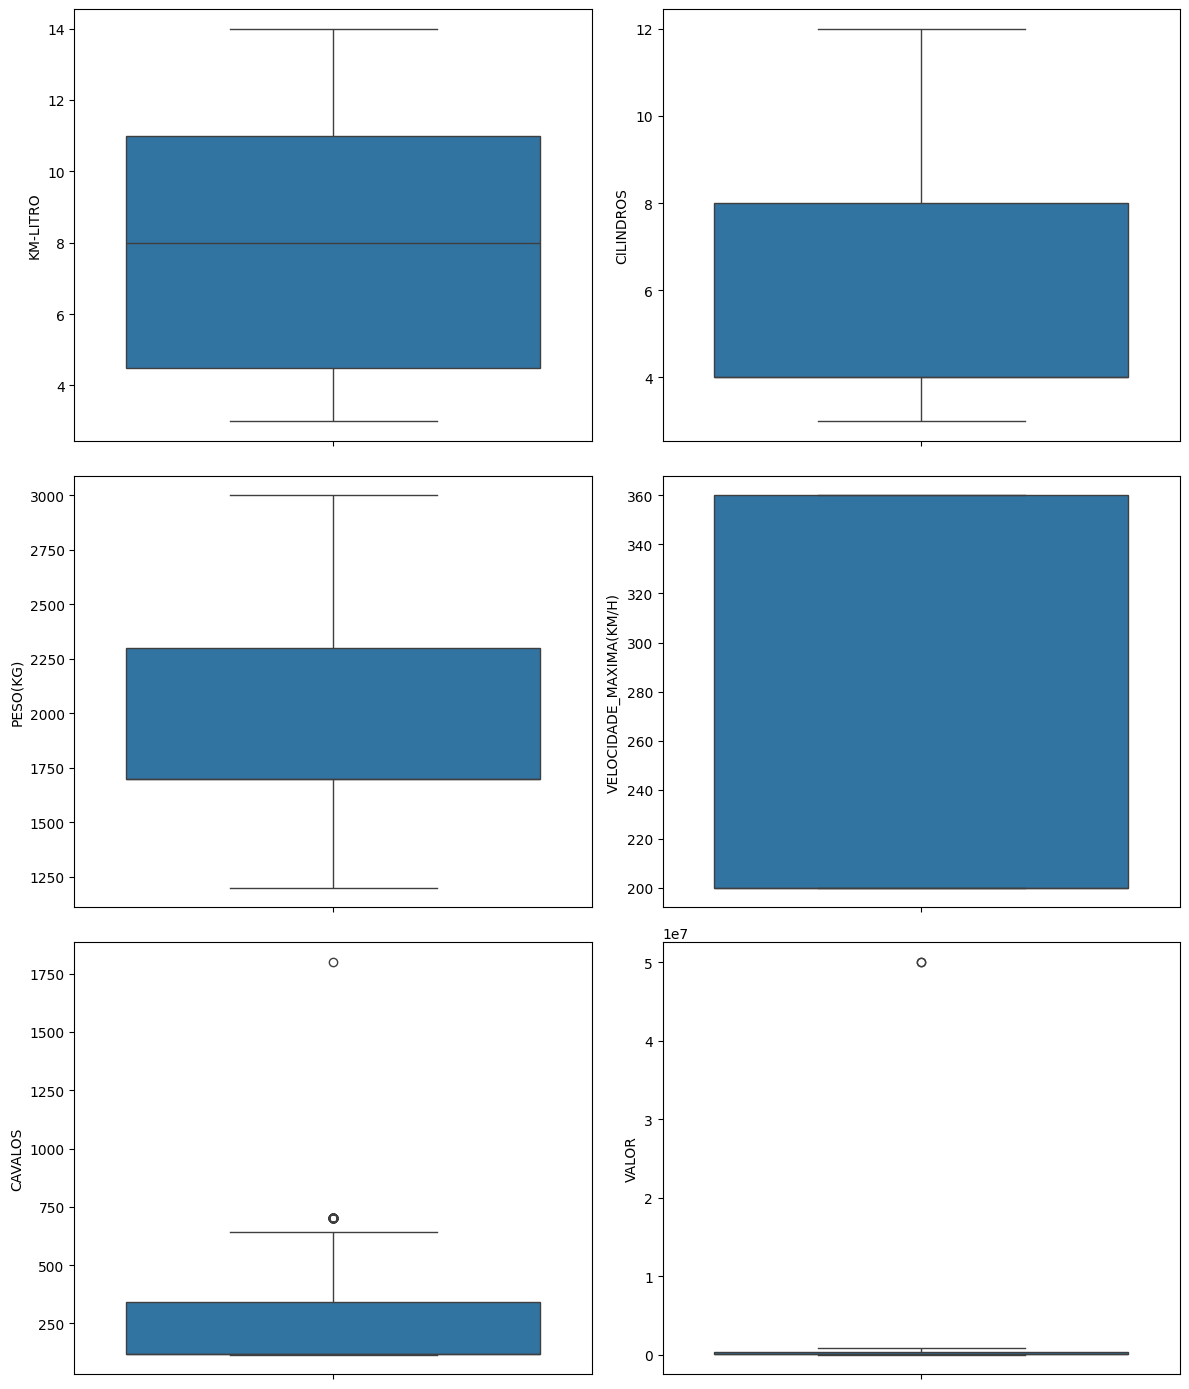

In [32]:
# Geração de gráficos do tipo Boxplot para avaliação das variáveis numéricas
plt.rcParams["figure.figsize"] = [12.00, 14.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(3, 2) #3 linhas e 2 colunas

linha = 0
coluna = 0

for i in variaveis_numericas:
    sns.boxplot(data = df_dados, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0            

plt.show()

In [33]:
# Observe nos DOIS ULTIMOS boxplot que há os pontinhos acima das linhas. Esses valores são outliers
# Agora já sabemos que temos OUTLIERS nas variáveis CAVALOS e VALOR. Vamos olhar quais são esses outliers para avaliar
# como iremos trata-los.

# Como no boxplot acima mostra que o maior número de cavalos está em torno de 700, então iremos listar os casos acima de 700
# Observe que após listarmos só temos um registro com OUTLIER.

df_dados.loc[df_dados['CAVALOS'] > 700]

,DATA_VENDA,MODELO,KM-LITRO,CILINDROS,PESO(KG),VELOCIDADE_MAXIMA(KM/H),CAVALOS,TRANSMISSAO,VALOR,CATEGORIA
11,10/1/2020,CORSA,9.0,4,1900,200,1800,MANUAL,35000.0,NACIONAL


In [34]:
# Como o caso acima possivelmente se trata de erro de digitação, e que pode influenciar futuras análises, vamos excluir o registro
df_dados.drop(df_dados.loc[df_dados['CAVALOS'] == 1800].index, inplace=True)

In [35]:
# Agora para a variavel VALOR vamos listar os valores maiores que 900.000
# Observe que temos dois registros considerados outlier, ou seja, o valor está muito acima do normal.

# Neste caso vamos substituir os valores pelo valor médio do modelo LAMBORGUINI.

df_dados.loc[df_dados['VALOR'] > 900000]

mediana_lamborguini = df_dados.loc[df_dados['MODELO'] == 'LABORGUINI', 'VALOR'].median()
df_dados.loc[(df_dados['VALOR'] > 900000) & (df_dados['MODELO'] == 'LABORGUINI'), 'VALOR'] = mediana_lamborguini

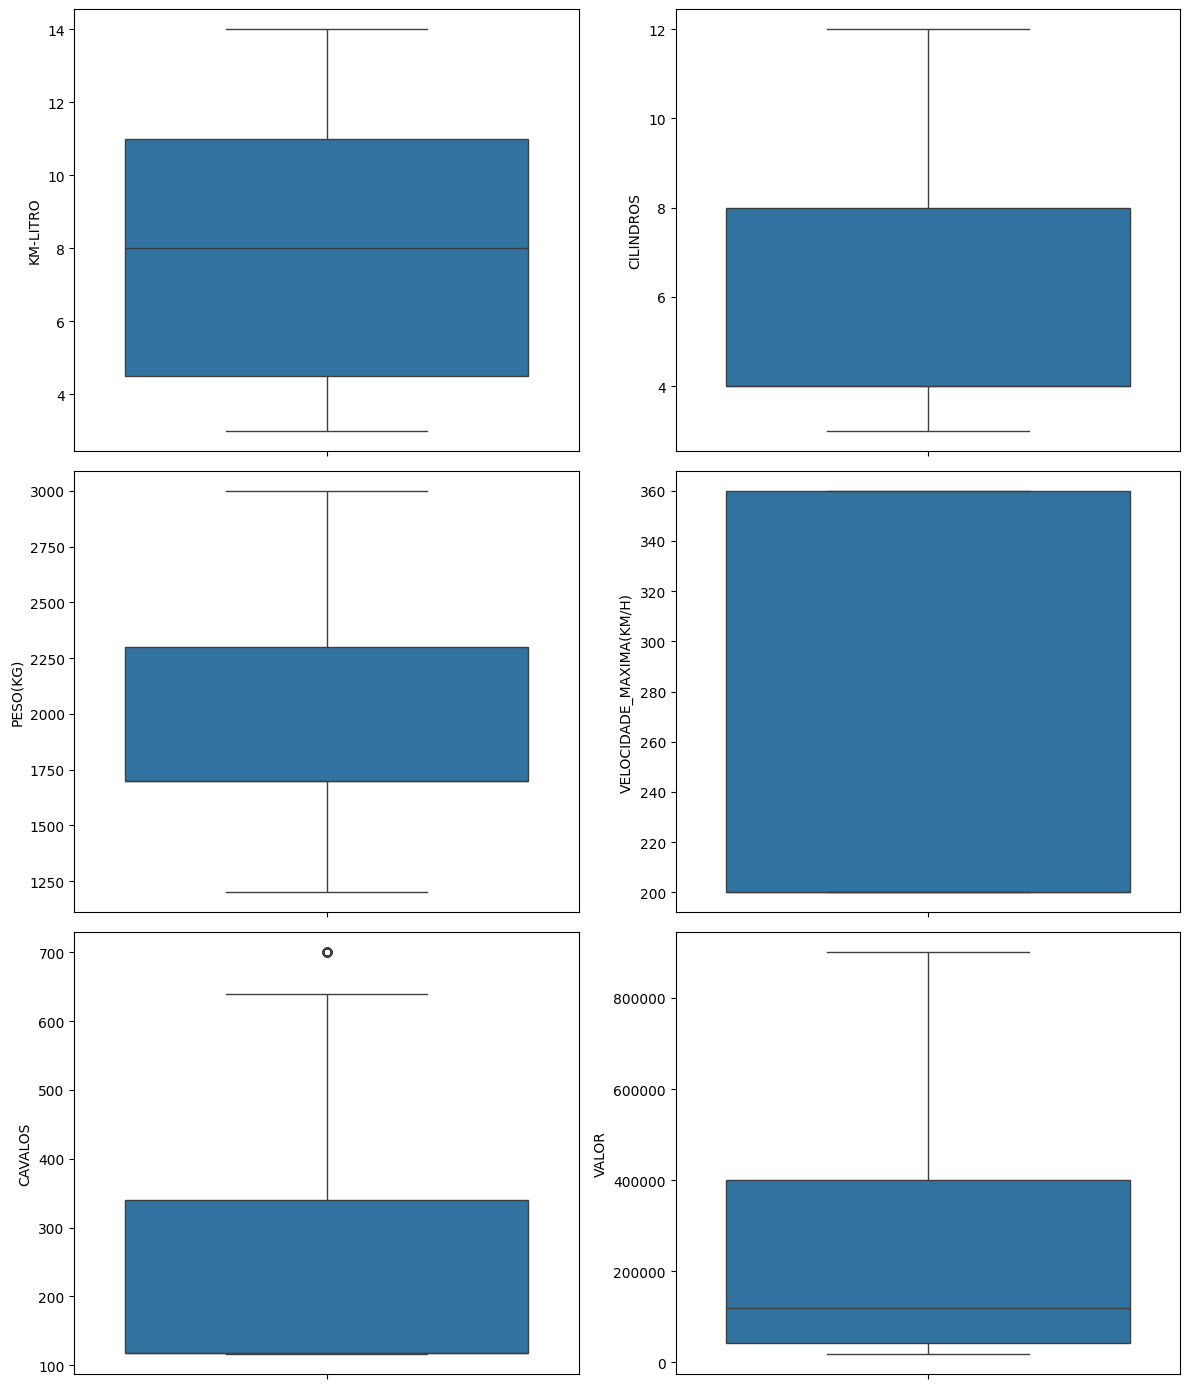

In [36]:
# Vamos avaliar novamente os boxplot e verificar se ficou algum OUTLIER
# Observe que na coluna cavalos de potencia ainda possuem alguns OUTLIERS porém nesse caso, olhando para o modelos dos carros
# podemos observar que realmente é a potencia deles. Nesse caso podemos mante-los.

# Aqui definimos o tamanho da tela para exibição dos gráficos
plt.rcParams["figure.figsize"] = [12.00, 14.00]
plt.rcParams["figure.autolayout"] = True

# Aqui definimos em quantas linhas e colunas queremos exibir os gráficos
f, axes = plt.subplots(3, 2) #3 linhas e 2 colunas

linha = 0
coluna = 0

for i in variaveis_numericas:
    sns.boxplot(data = df_dados, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0            

plt.show()

## 5- Padronização de Dados

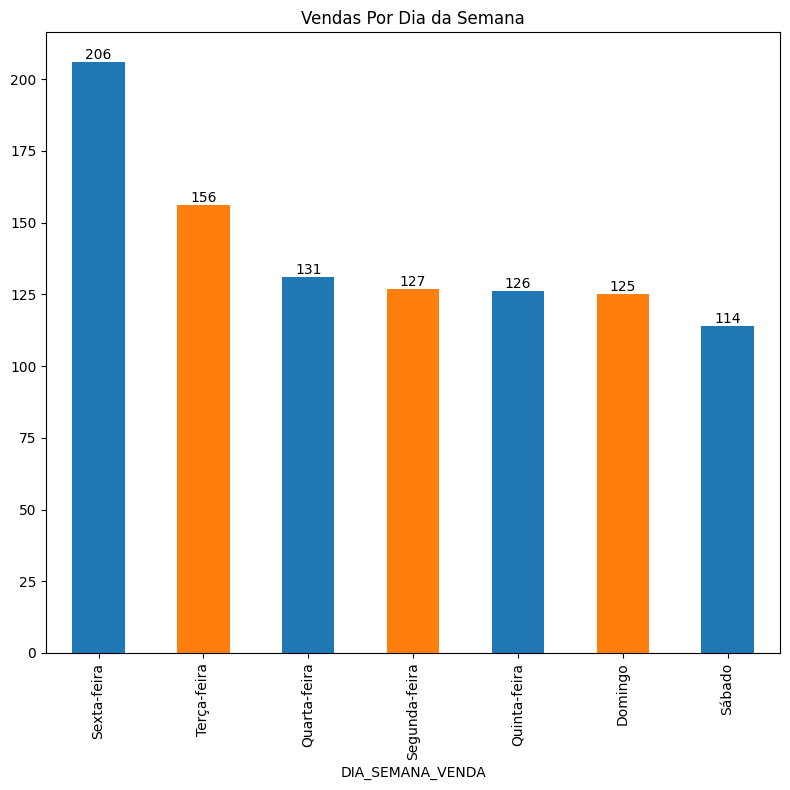

In [40]:
# Para a coluna "DATA_VENDA", serão adicionadas novas colunas, retornando ano, mês, dia do mês e dia da semana, para facilitar análises de vendas por sazonalidade

locale.setlocale(locale.LC_ALL, 'pt_BR.utf8')

df_dados['DATA_VENDA'] =  pd.to_datetime(df_dados['DATA_VENDA'], format='%d/%m/%Y')
df_dados['DATA_VENDA'] = df_dados['DATA_VENDA'].dt.date
df_dados['ANO_VENDA'] = pd.DatetimeIndex(df_dados['DATA_VENDA']).year
df_dados['MES_VENDA'] = pd.DatetimeIndex(df_dados['DATA_VENDA']).month
df_dados['DIA_VENDA'] = pd.DatetimeIndex(df_dados['DATA_VENDA']).day
df_dados['DIA_SEMANA_VENDA'] = pd.DatetimeIndex(df_dados['DATA_VENDA']).day_name(locale = 'pt_BR.utf8')


plt.rcParams["figure.figsize"] = [8.00, 8.00]
plt.rcParams["figure.autolayout"] = True
ax = df_dados.DIA_SEMANA_VENDA.value_counts().plot(kind='bar', title='Vendas Por Dia da Semana', color=['#1F77B4', '#FF7F0E'])

for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.show()


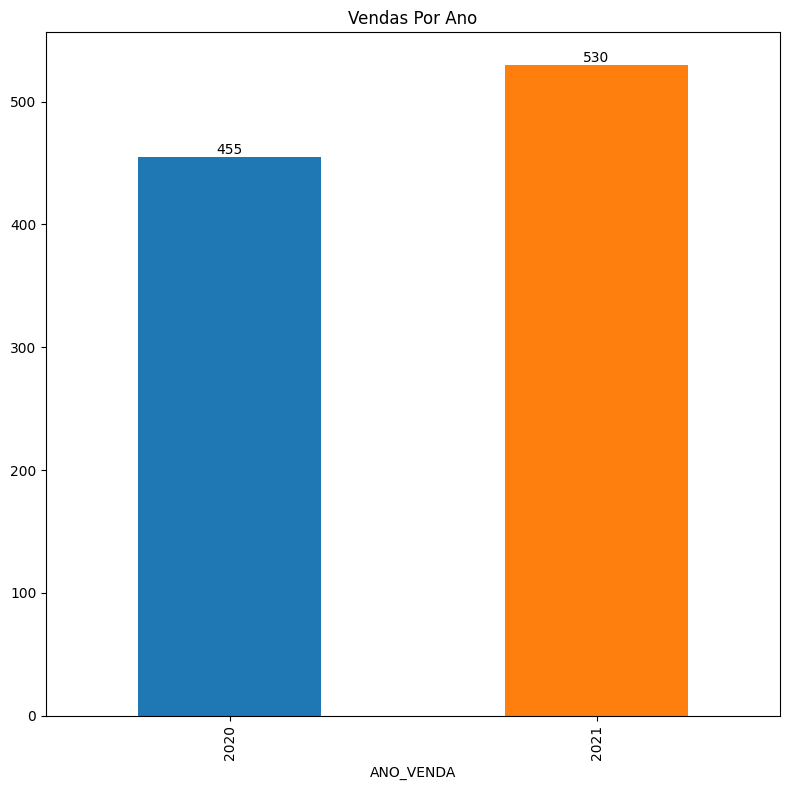

In [41]:
# Análise de vendas por ano

plt.rcParams["figure.figsize"] = [8.00, 8.00]
plt.rcParams["figure.autolayout"] = True
ax = df_dados.ANO_VENDA.value_counts().sort_index().plot(kind='bar', title='Vendas Por Ano', color=['#1F77B4', '#FF7F0E'])

for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
    
plt.show()

### 5.1 - Criação de variáveis Dummys (One Hot Encoding)

<p> Quando estamos fazendo o tratamento dos dados para criação de um modelo de Machine Learning ou IA precisamos deixar todos os dados como números.
<p> Para este processo utilizamos variaveis Dummys ou também as conhecidas como One Hot Encoding

In [43]:
# Antes de gerar as variaveis dummys/one hot encoding vamos excluir as variaveis que não precisaremos mais.
# Neste caso vamos excluir a variavel DATA_VENDA, pois já geramos as variaveis separadas de ANO, MES e DIA
df_dados.drop('DATA_VENDA', axis=1, inplace=True)

In [44]:
# Convert os campos categoricos para ONE HOT ENCODING

df_dados = pd.get_dummies(df_dados)

In [45]:
# Visualização do DataFrame após as transformações de dados
df_dados.head()

,KM-LITRO,CILINDROS,PESO(KG),VELOCIDADE_MAXIMA(KM/H),CAVALOS,VALOR,ANO_VENDA,MES_VENDA,DIA_VENDA,MODELO_ASTON MARTIN,MODELO_BMW X1,MODELO_BMW X5,MODELO_COROLLA,MODELO_CORSA,MODELO_CRETA,MODELO_FERRARI,MODELO_GOL,MODELO_HB20,MODELO_HONDA FIT,MODELO_JEEP COMPASS,MODELO_JEEP RENEGADE,MODELO_LABORGUINI,MODELO_MERCEDES SL80,MODELO_MOBI,MODELO_PAJERO,MODELO_PALIO,MODELO_PARATI,MODELO_PASSAT,MODELO_SAVEIRO,MODELO_UNO,MODELO_VECTRA,TRANSMISSAO_AUTOMATICO,TRANSMISSAO_MANUAL,CATEGORIA_IMPORTADO,CATEGORIA_NACIONAL,DIA_SEMANA_VENDA_Domingo,DIA_SEMANA_VENDA_Quarta-feira,DIA_SEMANA_VENDA_Quinta-feira,DIA_SEMANA_VENDA_Segunda-feira,DIA_SEMANA_VENDA_Sexta-feira,DIA_SEMANA_VENDA_Sábado,DIA_SEMANA_VENDA_Terça-feira
0,3.0,12,1200,360,700,900000.0,2020,1,10,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False
1,3.0,12,1200,360,700,900000.0,2020,1,10,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False
2,3.0,12,1200,360,700,900000.0,2020,1,10,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False
3,3.0,12,1400,360,640,900000.0,2020,1,10,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False
4,3.5,10,1600,360,620,900000.0,2020,1,10,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False


## 6- Visualização consolidada das características do DataFrame

Com o objetivo de verificar de forma unificada as características de todas as variáveis, utilizaremos a biblioteca sweetviz

In [46]:
import sweetviz as sv

my_report = sv.analyze(df_dados)
my_report.show_html(filepath = "relatorio_variaveis.html" ) # Se não for informado o nome do arquivo, será gerado automaticamente com o nome "SWEETVIZ_REPORT.html"

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)


Report relatorio_variaveis.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## 7- Exportação do DataFrame (Opcional)

In [47]:
# Exportar para Excel
df_dados.to_excel('dados_tratados.xlsx', index=False)

In [48]:
# Exportar para CSV
df_dados.to_csv('dados_tratados.csv', index=False, encoding='utf-8')